This lab on Linear Regression is a python adaptation of p. 109-119 of "Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani. Written by R. Jordan Crouser at Smith College for SDS293: Machine Learning (Spring 2016).

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option('precision', 2) # number precision for pandas
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', '{:20,.2f}'.format) # get rid of scientific notation
plt.style.use('seaborn') # pretty matplotlib plots

In [3]:
df = pd.read_csv('./datasets/Boston.csv', index_col=0)
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
2,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
3,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
4,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
5,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33,36.20


## Simple Linear Regression

Now let's fit a simple linear model (OLS - for "ordinary least squares" method) with ${\tt medv}$ as the response and ${\tt lstat}$ as the predictor:

In [4]:
import statsmodels.api as sm

# predictor & dependent var
x_train = df['lstat']
y_true = df['medv']

# ols model with intercept added to predictor
ols_sm = sm.OLS(y_true, sm.add_constant(x_train))

# fitted model and summary
ols_sm_results = ols_sm.fit()
ols_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           5.08e-88
Time:                        16:59:21   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
ols_sm_results

Now let's try making some predictions using this model. First, we'll set up a dataframe containing the ${\tt lstat}$ values for which we want to predict a response:

In [6]:
new = pd.DataFrame([[1, 5], [1, 10], [1, 15]], columns=['Intercept', 'lstat'])

In [7]:
new

,Intercept,lstat
0,1,5
1,1,10
2,1,15


In [8]:
ols_sm_results.predict(new)

0                  29.80
1                  25.05
2                  20.30
dtype: float64

Technically those are the right prediction values, but maybe it would be good to have the confidence intervals along with them.

In [9]:
from statsmodels.sandbox.regression.predstd import wls_prediction_std
from collections import OrderedDict

y_pred = ols_sm_results.predict(sm.add_constant(x_train))
prstd, iv_l, iv_u = wls_prediction_std(ols_sm_results)

pred_dict = OrderedDict({'x_train': x_train,
                         'y_pred': y_pred, 
                         'y_true': y_true, 
                         'lwr': iv_l, 
                         'upr': iv_u, 
                         'pred_se': prstd})

pd.DataFrame(pred_dict)

,x_train,y_pred,y_true,lwr,upr,pred_se
1,4.98,29.82,24.00,17.58,42.06,6.23
2,9.14,25.87,21.60,13.64,38.10,6.22
3,4.03,30.73,34.70,18.48,42.97,6.23
4,2.94,31.76,33.40,19.51,44.01,6.23
5,5.33,29.49,36.20,17.25,41.73,6.23
...,...,...,...,...,...,...
502,9.67,25.37,22.40,13.14,37.59,6.22
503,9.08,25.93,20.60,13.70,38.15,6.22
504,5.64,29.20,23.90,16.96,41.43,6.23
505,6.48,28.40,22.00,16.16,40.63,6.23


c:\users\adhar\anaconda3\envs\fintech\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


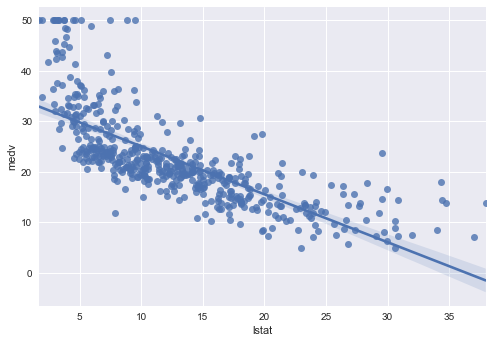

In [10]:
sns.regplot('lstat', 'medv', data=df);

c:\users\adhar\anaconda3\envs\fintech\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\adhar\anaconda3\envs\fintech\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


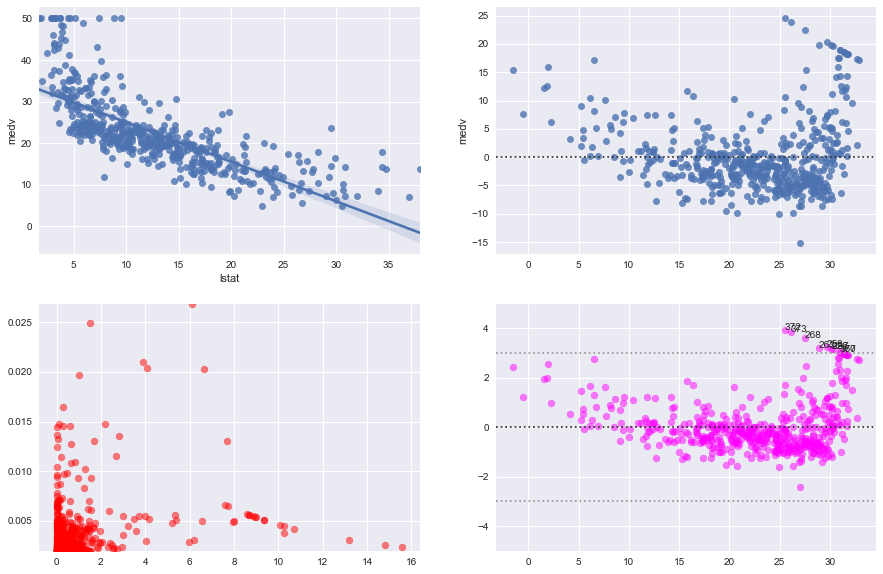

In [11]:
from statsmodels.graphics.regressionplots import *

ols_sm_resid = ols_sm_results.resid # residuals
ols_sm_resid_stud = ols_sm_resid / prstd # studentized residuals

f, axes = plt.subplots(2, 2, sharex=False, sharey=False) 
f.set_figheight(10)
f.set_figwidth(15)

sns.regplot('lstat', 'medv', data=df, ax=axes[0, 0]) # regression plot
sns.residplot(y_pred, 'medv', data=df, ax=axes[0, 1]) # residual plot

#plot_leverage_resid2(ols_sm_results, ax=axes[1, 0], color='red') # leverage plot

# custom leverage plot instead of above
from statsmodels.stats.outliers_influence import OLSInfluence
from scipy.stats import zscore
norm_resid = zscore(ols_sm_resid)
leverage = OLSInfluence(ols_sm_results).hat_matrix_diag
axes[1, 0].autoscale(enable=True, axis='y', tight=True)
axes[1, 0].scatter(norm_resid ** 2, leverage, alpha=0.5, color='red')

# studentized residual plot
axes[1, 1].scatter(y_pred, ols_sm_resid_stud, alpha=0.5, color='magenta')
axes[1, 1].axhline(0, ls=":", c=".2")
axes[1, 1].axhline(-3, ls=":", c=".6")
axes[1, 1].axhline(3, ls=":", c=".6")
axes[1, 1].set_ylim(-5, 5)

x = y_pred[np.logical_or(ols_sm_resid_stud > 3, ols_sm_resid_stud < -3)]
y = ols_sm_resid_stud[np.logical_or(ols_sm_resid_stud > 3, ols_sm_resid_stud < -3)]

for i, x, y in zip(x.index, x, y):
    axes[1, 1].annotate(i, xy=(x, y));

We will now plot ${\tt medv}$ and ${\tt lstat}$ along with the least squares regression line using the ${\tt regplot()}$ function. We can define the color of the fit line using ${\tt line\_kws}$ ("line keywords"):

c:\users\adhar\anaconda3\envs\fintech\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y, data. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='lstat', ylabel='medv'>

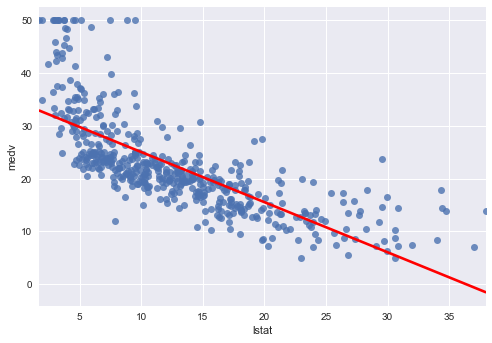

In [12]:
sns.regplot('lstat', 'medv', df, line_kws = {"color":"r"}, ci=None)

c:\users\adhar\anaconda3\envs\fintech\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='Fitted Values', ylabel='Residuals'>

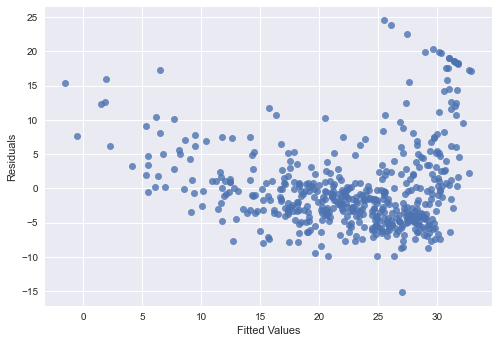

In [13]:
fitted_values = pd.Series(ols_sm_results.fittedvalues, name="Fitted Values")
residuals = pd.Series(ols_sm_results.resid, name="Residuals")
sns.regplot(fitted_values, residuals, fit_reg=False)

Perhaps we want normalized residuals instead?

<AxesSubplot:xlabel='Fitted Values', ylabel='S. Residuals'>

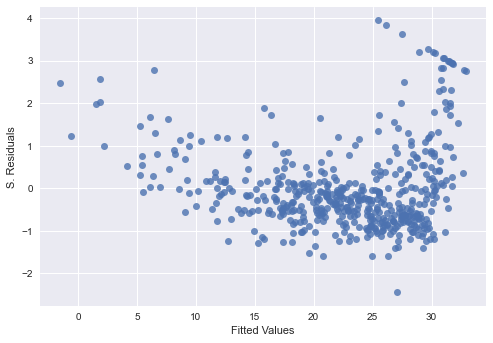

In [14]:
s_residuals = pd.Series(ols_sm_results.resid_pearson, name="S. Residuals")
sns.regplot(fitted_values, s_residuals,  fit_reg=False)

We can also look for points with high leverage:

<AxesSubplot:xlabel='Leverage', ylabel='S. Residuals'>

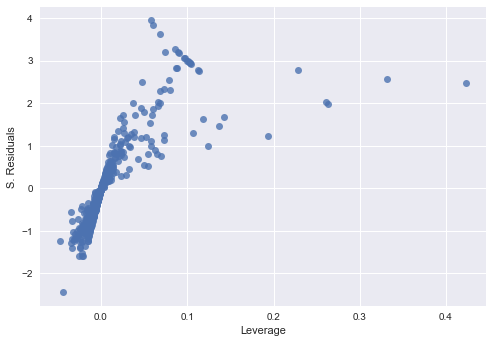

In [15]:
from statsmodels.stats.outliers_influence import OLSInfluence
leverage = pd.Series(OLSInfluence(ols_sm_results).influence, name = "Leverage")
sns.regplot(leverage, s_residuals,  fit_reg=False)

## Multiple Linear Regression

In order to fit a multiple linear regression model using least squares, we again use the ${\tt from\_formula()}$ function. The syntax ${\tt from\_formula(y∼x1+x2+x3)}$ is used to fit a model with three predictors, $x1$, $x2$, and $x3$. The ${\tt summary()}$ function now outputs the regression coefficients for all the predictors.

In [16]:
# predictors & dependent var
x_train = df[['lstat', 'age']]
y_true = df['medv']

# ols model with intercept added to predictor
ols_sm = sm.OLS(y_true, sm.add_constant(x_train))

# fitted model and summary
ols_sm_results = ols_sm.fit()
ols_sm_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.551
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     309.0
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           2.98e-88
Time:                        16:59:22   Log-Likelihood:                -1637.5
No. Observations:                 506   AIC:                             3281.
Df Residuals:                     503   BIC:                             3294.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         33.2228      0.731     45.458      0.000      31.787      34.659
lstat         -1.0321      0.048    -21.416      0.000      -1.127      -0.937
age            0.0345      0.012      2.826      0.005       0.011       0.059
==============================================================================
Omnibus:                      124.288   Durbin-Watson:                   0.945
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              244.026
Skew:                           1.362   Prob(JB):                     1.02e-53
Kurtosis:                       5.038   Cond. No.                         201.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [17]:
df

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.01,18.00,2.31,0,0.54,6.58,65.20,4.09,1,296,15.30,396.90,4.98,24.00
2,0.03,0.00,7.07,0,0.47,6.42,78.90,4.97,2,242,17.80,396.90,9.14,21.60
3,0.03,0.00,7.07,0,0.47,7.18,61.10,4.97,2,242,17.80,392.83,4.03,34.70
4,0.03,0.00,2.18,0,0.46,7.00,45.80,6.06,3,222,18.70,394.63,2.94,33.40
5,0.07,0.00,2.18,0,0.46,7.15,54.20,6.06,3,222,18.70,396.90,5.33,36.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
502,0.06,0.00,11.93,0,0.57,6.59,69.10,2.48,1,273,21.00,391.99,9.67,22.40
503,0.05,0.00,11.93,0,0.57,6.12,76.70,2.29,1,273,21.00,396.90,9.08,20.60
504,0.06,0.00,11.93,0,0.57,6.98,91.00,2.17,1,273,21.00,396.90,5.64,23.90
505,0.11,0.00,11.93,0,0.57,6.79,89.30,2.39,1,273,21.00,393.45,6.48,22.00


In [20]:
# df.columns.difference(['medv'])

In [23]:
import statsmodels.formula.api as smf # R-style formula api
def ols_formula(df, dependent_var, *excluded_cols):
    '''
    Generates the R style formula for statsmodels (patsy) given
    the dataframe, dependent variable and optional excluded columns
    as strings
    '''
    df_columns = list(df.columns.values)
    df_columns.remove(dependent_var)
    for col in excluded_cols:
        df_columns.remove(col)
    return dependent_var + ' ~ ' + ' + '.join(df_columns)


In [25]:
# ols model with intercept
ols_smf = smf.ols(formula=ols_formula(df, 'medv'), data=df)

# fitted model and summary
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          6.72e-135
Time:                        17:01:25   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crim          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
zn             0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
chas           2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
rm             3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dis           -1.4756      0.199     -7.398      0.000      -1.867      -1.084
rad            0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
ptratio       -0.9527      0.131     -7.283      0.000      -1.210      -0.696
black          0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Interaction Terms


It is easy to include interaction terms in a linear model using the ${\tt .from\_formula()}$ function. The syntax ${\tt lstat:black}$ tells Python to include an interaction term between ${\tt lstat}$ and ${\tt black}$. The syntax ${\tt lstat*age}$ simultaneously includes ${\tt lstat}$, ${\tt age}$, and the interaction term ${\tt lstat×age}$ as predictors; it is a shorthand for ${\tt lstat+age+lstat:age}$

In [34]:
# ols model with intercept
ols_smf = smf.ols(formula='medv ~ lstat * age', data=df)

# fitted model and summary
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.556
Model:                            OLS   Adj. R-squared:                  0.553
Method:                 Least Squares   F-statistic:                     209.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           4.86e-88
Time:                        17:46:33   Log-Likelihood:                -1635.0
No. Observations:                 506   AIC:                             3278.
Df Residuals:                     502   BIC:                             3295.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.0885      1.470     24.553      0.000      33.201      38.976
lstat         -1.3921      0.167     -8.313      0.000      -1.721      -1.063
age           -0.0007      0.020     -0.036      0.971      -0.040       0.038
lstat:age      0.0042      0.002      2.244      0.025       0.001       0.008
==============================================================================
Omnibus:                      135.601   Durbin-Watson:                   0.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              296.955
Skew:                           1.417   Prob(JB):                     3.29e-65
Kurtosis:                       5.461   Cond. No.                     6.88e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.88e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Non-linear Transformations of Predictors

In [36]:
# ols model with intercept
ols_smf = smf.ols(formula='medv ~ lstat + np.power(lstat, 2)', data=df)

# fitted model and summary
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.641
Model:                            OLS   Adj. R-squared:                  0.639
Method:                 Least Squares   F-statistic:                     448.5
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          1.56e-112
Time:                        17:47:33   Log-Likelihood:                -1581.3
No. Observations:                 506   AIC:                             3169.
Df Residuals:                     503   BIC:                             3181.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             42.8620      0.872     49.149      0.000      41.149      44.575
lstat                 -2.3328      0.124    -18.843      0.000      -2.576      -2.090
np.power(lstat, 2)     0.0435      0.004     11.628      0.000       0.036       0.051
==============================================================================
Omnibus:                      107.006   Durbin-Watson:                   0.921
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              228.388
Skew:                           1.128   Prob(JB):                     2.55e-50
Kurtosis:                       5.397   Cond. No.                     1.13e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
# anova of the two models
ols_smf = smf.ols(formula='medv ~ lstat', data=df).fit()
ols_smf2 = smf.ols(formula='medv ~ lstat + np.power(lstat, 2)', data=df).fit()

sm.stats.anova_lm(ols_smf, ols_smf2)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,504.00,"19,472.38",0.00,nan,nan,nan
1,503.00,"15,347.24",1.00,"4,125.14",135.20,0.00


c:\users\adhar\anaconda3\envs\fintech\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\adhar\anaconda3\envs\fintech\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
c:\users\adhar\anaconda3\envs\fintech\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  

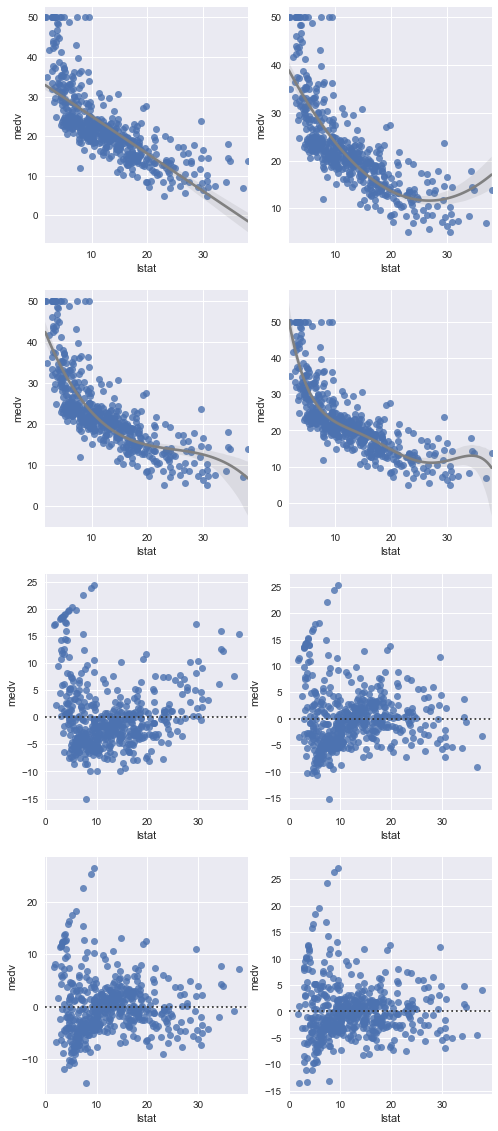

In [40]:
f, axes = plt.subplots(4, 2, sharex=False, sharey=False)
f.set_figheight(20)

sns.regplot('lstat', 'medv', data=df, ax=axes[0, 0], order=1, line_kws={'color': 'gray'})
sns.regplot('lstat', 'medv', data=df, ax=axes[0, 1], order=2, line_kws={'color': 'gray'})
sns.regplot('lstat', 'medv', data=df, ax=axes[1, 0], order=3, line_kws={'color': 'gray'})
sns.regplot('lstat', 'medv', data=df, ax=axes[1, 1], order=5, line_kws={'color': 'gray'})
sns.residplot('lstat', 'medv', data=df, ax=axes[2, 0], order=1, line_kws={'color': 'gray'})
sns.residplot('lstat', 'medv', data=df, ax=axes[2, 1], order=2, line_kws={'color': 'gray'})
sns.residplot('lstat', 'medv', data=df, ax=axes[3, 0], order=3, line_kws={'color': 'gray'})
sns.residplot('lstat', 'medv', data=df, ax=axes[3, 1], order=5, line_kws={'color': 'gray'});

In [42]:
# polynomial ols model with intercept
# patsy way
ols_smf = smf.ols(formula='medv ~ lstat + I(lstat**2) + I(lstat**3) + I(lstat**4) + I(lstat**5)',
                  data=df)

# fitted model and summary
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.679
Method:                 Least Squares   F-statistic:                     214.2
Date:                Mon, 08 Mar 2021   Prob (F-statistic):          8.73e-122
Time:                        18:11:51   Log-Likelihood:                -1550.6
No. Observations:                 506   AIC:                             3113.
Df Residuals:                     500   BIC:                             3139.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        67.6997      3.604     18.783      0.000      60.618      74.781
lstat           -11.9911      1.526     -7.859      0.000     -14.989      -8.994
I(lstat ** 2)     1.2728      0.223      5.703      0.000       0.834       1.711
I(lstat ** 3)    -0.0683      0.014     -4.747      0.000      -0.097      -0.040
I(lstat ** 4)     0.0017      0.000      4.143      0.000       0.001       0.003
I(lstat ** 5) -1.632e-05   4.42e-06     -3.692      0.000    -2.5e-05   -7.63e-06
==============================================================================
Omnibus:                      144.085   Durbin-Watson:                   0.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              494.545
Skew:                           1.292   Prob(JB):                    4.08e-108
Kurtosis:                       7.096   Cond. No.                     1.37e+08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.37e+08. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [43]:
# polynomial ols model with intercept
ols_smf = smf.ols(formula='medv ~ np.log(rm)', data=df)

# fitted model and summary
ols_smf_results = ols_smf.fit()
ols_smf_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.435
Method:                 Least Squares   F-statistic:                     389.3
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.22e-64
Time:                        18:14:58   Log-Likelihood:                -1695.4
No. Observations:                 506   AIC:                             3395.
Df Residuals:                     504   BIC:                             3403.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -76.4878      5.028    -15.213      0.000     -86.366     -66.610
np.log(rm)    54.0546      2.739     19.732      0.000      48.672      59.437
==============================================================================
Omnibus:                      117.102   Durbin-Watson:                   0.681
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              584.336
Skew:                           0.916   Prob(JB):                    1.30e-127
Kurtosis:                       7.936   Cond. No.                         38.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

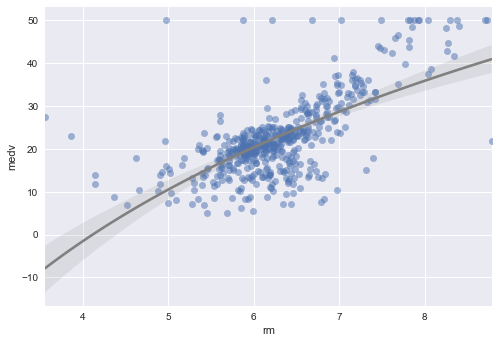

In [45]:
sns.regplot('rm', 
            'medv', 
            data=df, 
            logx=True, 
            line_kws={'color': 'gray'}, 
            scatter_kws={'alpha': 0.5});